<a href="https://colab.research.google.com/github/ellaclauz/superstore_sales_python_dashboard/blob/main/Superstore_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCTION

The Superstore dataset is a rich and comprehensive dataset containing information on the sales, orders, and customers of a fictional superstore. The dataset provides a detailed view of the business operations of the superstore, including information on the products sold, the customers who purchase them, and the sales performance across different regions and categories. This dataset is a valuable resource for data analysts, business intelligence professionals, and anyone interested in understanding the dynamics of retail sales and customer behavior. With about 9,994 rows of data spanning four years (2014-2017), the Superstore dataset provides a wealth of information to analyze and explore.

In this report, I perform python-based exploratory data analysis to gain insights about the fictional superstore.






## Step 1. Imports

*  Import packages
*  Load dataset



### Import packages

In [1]:
# For data manipulation

import pandas as pd
import numpy as np

# For data visualization

import seaborn as sn
import matplotlib.pyplot as plt

### Load dataset

In [2]:
# Load dataset into dataframe

superstore = pd.read_csv("SuperStoreData.csv")

# Display first few rows of the dataframe
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Step 2. Data Exploration (Initial EDA and data cleaning)





### Gather basic information about the data

In [3]:
# number of rows and column
superstore.shape

(9994, 21)

There are 9994 rows and 21 columns

In [4]:
# Gather basic information about the data

superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
superstore.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

### Check missing values

Check for any missing values in the data.

In [6]:
# Checking for missing values
superstore.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There are no missing values in the data

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [30]:
# Display all columns

superstore.columns

Index(['Row_id', 'Order_id', 'Order_date', 'Ship_date', 'Ship_mode',
       'customer_id', 'Customer_name', 'Segment', 'Country', 'City', 'State',
       'Postal_code', 'Region', 'Product_id', 'Category', 'Sub_category',
       'Prouct_name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Revenue',
       'col', 'inplace', 'Total_revenue'],
      dtype='object')

In [8]:
# Rename columns as needed

superstore= superstore.rename(columns={"Row ID": "Row_id", "Order ID":"Order_id", "Order Date":"Order_date", 
                                       "Ship Date":"Ship_date", "Ship Mode":"Ship_mode", "Customer ID":"customer_id", 
                                       "Customer Name":"Customer_name", "Postal Code":"Postal_code","Product ID":"Product_id", 
                                       "Sub-Category":"Sub_category", "Product Name":"Prouct_name" })

In [9]:
# Display all column names after the update

superstore.columns

Index(['Row_id', 'Order_id', 'Order_date', 'Ship_date', 'Ship_mode',
       'customer_id', 'Customer_name', 'Segment', 'Country', 'City', 'State',
       'Postal_code', 'Region', 'Product_id', 'Category', 'Sub_category',
       'Prouct_name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Check duplicates

In [10]:
# checking for duplicate rows
superstore.duplicated().sum()

0

There are no duplicate rows

### Gather descriptive statistics about the data

In [11]:
# Use descriptive statistics to understand the distribution of numerical columns
superstore.describe().style.background_gradient(cmap ="Purples")

,Row_id,Postal_code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Analyze Stage
- Perform EDA (analyze relationships between variables) 


## Step 2. Data Exploration (Continue EDA)

### Data visualizations

## Question One

What is the total sales and profit of the superstore?

In [13]:
# Calculate total sales and profit
total_sales = superstore['Sales'].sum()
total_profit = superstore['Profit'].sum()

# Print the results
print('Total sales: ${:,.2f}'.format(total_sales))
print('Total profit: ${:,.2f}'.format(total_profit))


Total sales: $2,297,200.86
Total profit: $286,397.02


From the above calculation, we can see that the `Total Sales` is `$2,297,200.86` and the `Total Profit` is `$286,397.02`

## Question Two

What is the total sales and profit by category?

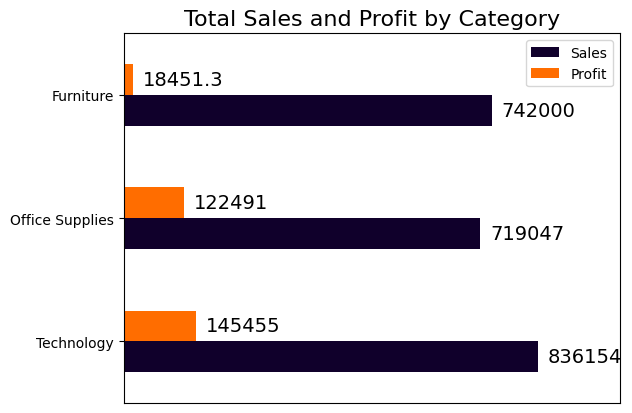

In [14]:
# Group by category and calculate total sales and profit
category_ts_p = superstore.groupby('Category')[['Sales', 'Profit']].sum()

# Plot the results using a bar chart
colors= ['#10002B', '#FF6D00']
plt1= category_ts_p.iloc[::-1].plot(kind='barh', color=colors)
plt1.set_title('Total Sales and Profit by Category', fontsize=16)
for i in plt1.containers:
    plt1.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt1.set_xticks([], [])
plt1.set_ylabel('')
plt1.set_xlim(0, 1000000)
plt1.patches[4].set_facecolor('#FF6D00')



The visualization above shows that `Technology` has the highest total sales and `Furniture` has the highest total profit, while `Furniture` has the next highest total sales and `Technology` has the next highest total profit. Also, `Office supplies` made the lowest in both total sales and total profit.

## Question Three

Show the top 5 states that made the highest sales 

In [15]:
# Group the top 5 states and calculate the total sales

sales_state = superstore.groupby('State')['Sales'].sum().sort_values(ascending=False).head()
sales_state


State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Name: Sales, dtype: float64

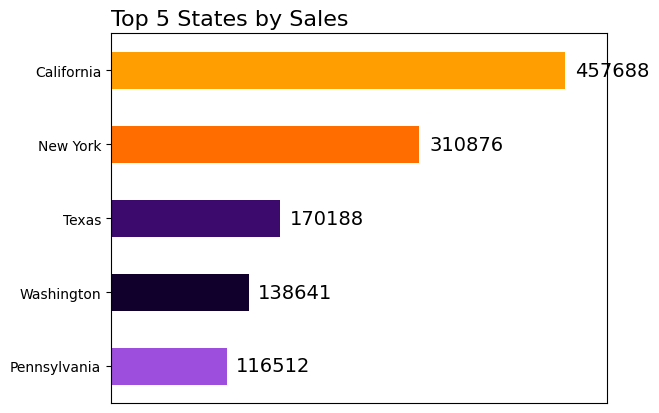

In [16]:
color = ['#9D4EDD', '#10002B', '#3C096C', '#FF6D00', '#FF9E00']
plt3 = sales_state.iloc[::-1].plot(kind='barh', color=color, legend=False)
plt3.set_title('Top 5 States by Sales', fontsize = 16, loc='left')
for i in plt3.containers:
    plt3.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt3.set_xticks([], [])
plt3.set_ylabel('')
plt3.set_xlim(0, 500000)
plt3.patches[4].set_facecolor=('purple')

`California` made the highest total sales of `$457,688`, followed by `New York` that made `$310,876` total sales.

## Question Four

Show the bottom 5 states that made the highest sales 

In [17]:
# Group the bottom 5 states and calculate the total sales

sales_bottom_state = superstore.groupby('State')['Sales'].sum().sort_values(ascending=False).tail()
sales_bottom_state

State
Wyoming          1603.136
South Dakota     1315.560
Maine            1270.530
West Virginia    1209.824
North Dakota      919.910
Name: Sales, dtype: float64

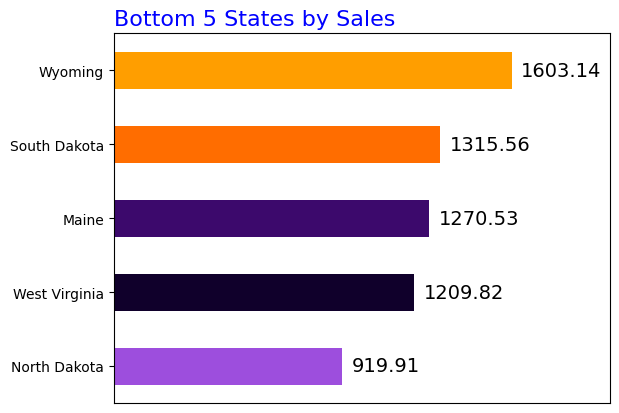

In [18]:
color = ['#9D4EDD', '#10002B', '#3C096C', '#FF6D00', '#FF9E00']
plt4 = sales_bottom_state.iloc[::-1].plot(kind='barh', color=color, legend=False)
plt4.set_title('Bottom 5 States by Sales', fontsize = 16, color="blue", loc='left')
for i in plt4.containers:
    plt4.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt4.set_xticks([], [])
plt4.set_ylabel('')
plt4.set_xlim(0, 2000)
plt4.patches[4].set_facecolor=('purple')

`North Dakota` has the lowest total sales of `$919.91`, followed by `West Virginia` and `Maine` that made `$1209.82` and `$1270.53` total sales respectively.

## Question Five

What is the total sales by region and category?

In [21]:
# Creating a pivot table to identify total sales by region and category 

totalsales_region_category = superstore.pivot_table(values='Sales', index='Region', columns='Category', aggfunc=np.sum)

totalsales_region_category

Category,Furniture,Office Supplies,Technology
Region,,,
Central,163797.1638,167026.415,170416.312
East,208291.2040,205516.055,264973.981
South,117298.6840,125651.313,148771.908
West,252612.7435,220853.249,251991.832


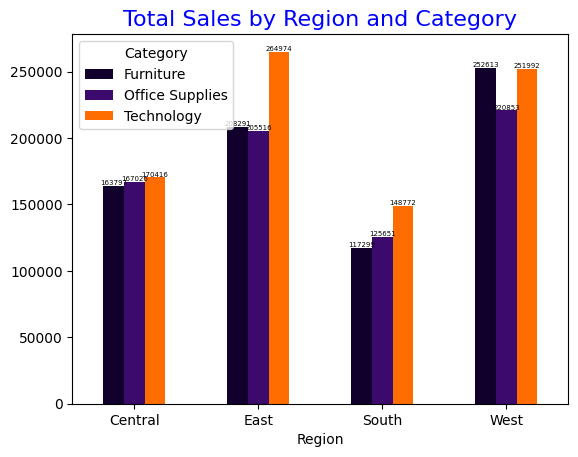

In [22]:
colors = ['#10002B', '#3C096C', '#FF6D00']
plt1 = totalsales_region_category.plot(kind='bar', color=colors)
plt1.set_title('Total Sales by Region and Category', fontsize=16, color= "blue")
for i in plt1.containers:
  plt1.bar_label(i, label_type='edge', fontsize=5)
plt1.set_xlabel=('')
plt1.set_ylabel=('')
plt1.tick_params(axis='x', rotation=0)




From the visualization above, `East Region` made the highest total sales in `Technology` category, and `West Region` made the highest sales in both `Furniture` and `Office Supplies` category. We can also see that the `South Region` made the lowest sales in all categories.

## Question Six 

What is the most popular ship mode class?

In [23]:
# Get the value count of ship mode and convert to percentage

counts= superstore['Ship_mode'].value_counts(normalize=True)*100
percent = counts.round(1).astype(str).add('%')
percent

Standard Class    59.7%
Second Class      19.5%
First Class       15.4%
Same Day           5.4%
Name: Ship_mode, dtype: object

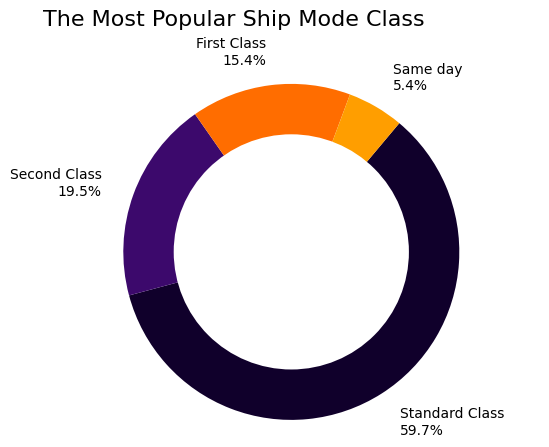

In [31]:
# Plot a donut chart
# set fig and axes

fig, ax = plt.subplots()
colors = ['#10002B', '#3C096C', '#FF6D00', '#FF9E00']
labels= ['Standard Class\n59.7%', 'Second Class\n19.5%', 'First Class\n15.4%', 'Same day\n5.4%']
ax.pie(counts, colors=colors, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('The Most Popular Ship Mode Class', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show()

`Standard Class` has the highest ship mode rate of `59.7%`, followed by `Second Class`, `first Class` and `Same Day` respectively.

## Question Seven

Calculate the average profit by region

Using the groupby function to calculate average profit by region

In [25]:
# Groupby to calculate average profit by region

average_profit_region= superstore.groupby(['Region'])['Profit'].mean()
average_profit_region

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

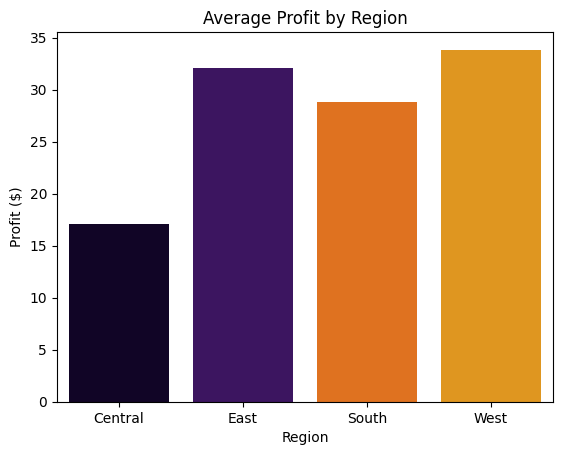

In [26]:
colors = ['#10002B', '#3C096C', '#FF6D00', '#FF9E00']
sn.barplot(x=average_profit_region.index, y=average_profit_region.values, palette=colors)
plt.title('Average Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit ($)')
plt.show()

`West Region` has the highest average profit.

In [39]:
# Create a new column that contains the total revenue

superstore['Revenue'] = superstore['Sales'] - superstore['Discount']
Total_revenue = superstore['Revenue'].sum()
Total_revenue


2295639.7703

The `Total Revenue` is `$229,564,0` approximately.

### Assign KPI's

In [48]:
# Assign KPI's

superstore = superstore.assign(col=['KPI']*9994, inplace=True)

# Create a new column that contains revenue

superstore['Revenue'] = superstore['Sales'] - superstore['Discount']
superstore['Revenue'].sum()

# create pivot tables
pivot1 = pd.pivot_table(superstore, values='Sales', index=None, columns='col', aggfunc=sum)
pivot2 = pd.pivot_table(superstore, values='State', index=None, columns='col', aggfunc=pd.Series.nunique)
pivot3 = pd.pivot_table(superstore, values='Profit', index=None, columns='col', aggfunc=sum)
pivot4 = pd.pivot_table(superstore, values='Discount', index=None, columns='col', aggfunc=sum)
pivot5 = pd.pivot_table(superstore, values='Revenue', index=None, columns='col', aggfunc=sum)


## Step 3. Dashboard Visualization



### Create dashboard using matplotlib and seaborn

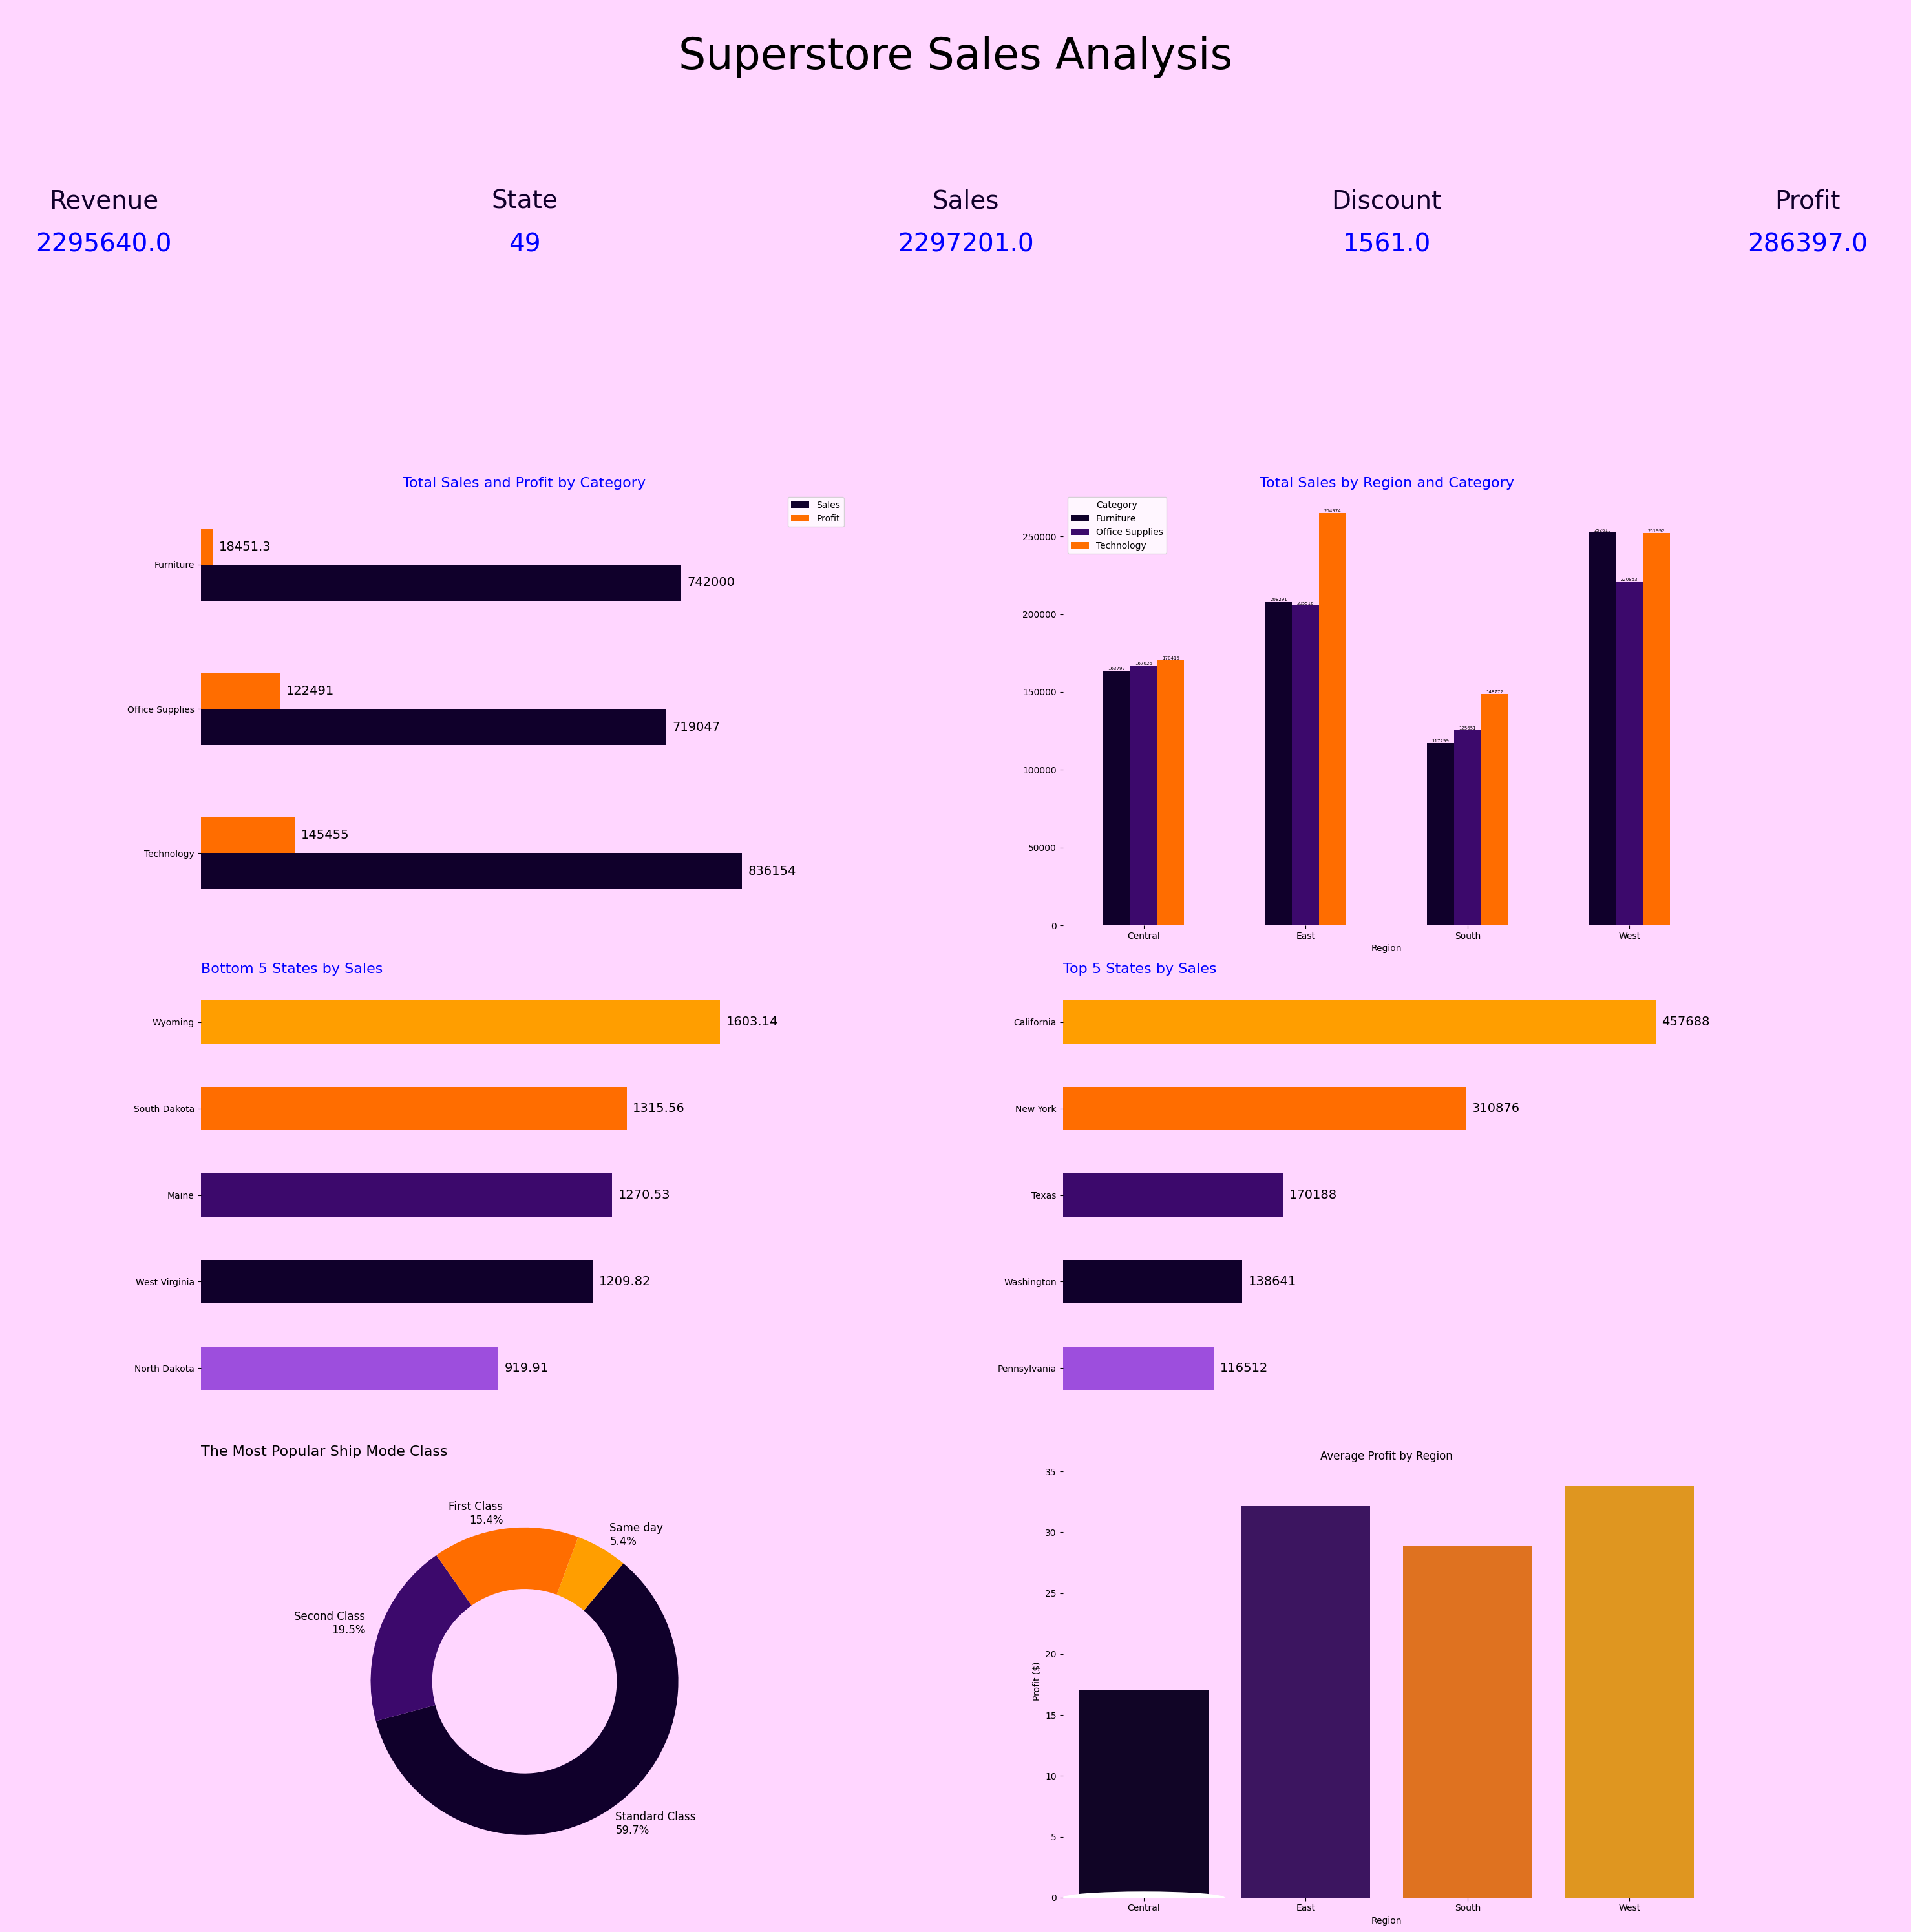

In [50]:
from matplotlib.patches import Wedge
fig, axs = plt.subplots(4, 2, figsize=(30, 30), facecolor='#FFD6FF')

# set the dashboard default edge color 
plt.rcParams['axes.edgecolor'] = 'none'

# set the dashboard default color cycle 
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FFD6FF'])

#avearage profit by region
colors = ['#10002B', '#3C096C', '#FF6D00', '#FF9E00']
sn.barplot(x=average_profit_region.index, y=average_profit_region.values, palette=colors )
plt.title('Average Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit ($)')

# ship mode class
colors = ['#10002B', '#3C096C', '#FF6D00', '#FF9E00']
labels= ['Standard Class\n59.7%', 'Second Class\n19.5%', 'First Class\n15.4%', 'Same day\n5.4%']
axs[3,0].pie(counts, colors=colors, labels=labels, startangle=50, counterclock=False, pctdistance=0.85, wedgeprops={'width':0.4})
axs[3,0].axis('equal')
circle = plt.Circle(xy=(0,0), radius=0.5, facecolor='white')
plt.gca().add_artist(circle)
axs[3,0].set_title('The Most Popular Ship Mode Class', fontsize = 16, loc='left', pad=10)
# adjust the size of the doughnut chart
axs[3, 0].set_xlim(-1, 1)
axs[3, 0].set_ylim(-1, 1)
axs[3, 0].set_autoscale_on(False)
# increase the font size of the labels
for text in axs[3, 0].texts:
    text.set_fontsize(12)

# total sales by region and category
colors = ['#10002B', '#3C096C', '#FF6D00']
plt1 = totalsales_region_category.plot(kind='bar', color=colors, ax=axs[1,1])
plt1.set_title('Total Sales by Region and Category', fontsize=16, color= "blue")
for i in plt1.containers:
  plt1.bar_label(i, label_type='edge', fontsize=5)
plt1.set_xlabel=('')
plt1.set_ylabel=('')
plt1.tick_params(axis='x', rotation=0)

#top 5 states by sales
color = ['#9D4EDD', '#10002B', '#3C096C', '#FF6D00', '#FF9E00']
plt3 = sales_state.iloc[::-1].plot(kind='barh', color=color, legend=False, ax=axs[2, 1])
plt3.set_title('Top 5 States by Sales', fontsize = 16, color= "blue", loc='left')
for i in plt3.containers:
    plt3.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt3.set_xticks([], [])
plt3.set_ylabel('')
plt3.set_xlim(0, 500000)
plt3.patches[4].set_facecolor=('purple')

# bottom 5 states by sales
color = ['#9D4EDD', '#10002B', '#3C096C', '#FF6D00', '#FF9E00']
plt4 = sales_bottom_state.iloc[::-1].plot(kind='barh', color=color, legend=False, ax=axs[2,0])
plt4.set_title('Bottom 5 States by Sales', fontsize = 16, color="blue", loc='left')
for i in plt4.containers:
    plt4.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt4.set_xticks([], [])
plt4.set_ylabel('')
plt4.set_xlim(0, 2000)
plt4.patches[4].set_facecolor=('purple')

# total sales and profit by category
colors= ['#10002B', '#FF6D00']
plt1= category_ts_p.iloc[::-1].plot(kind='barh', color=colors, ax=axs[1, 0])
plt1.set_title('Total Sales and Profit by Category', fontsize=16, color="blue")
for i in plt1.containers:
    plt1.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt1.set_xticks([], [])
plt1.set_ylabel('')
plt1.set_xlim(0, 1000000)
plt1.patches[4].set_facecolor('#FF6D00')

# key performance indicator
kpis = [axs[0, 1].table(cellText=pivot1.values.round(), colLabels=['Sales'], loc='left', cellLoc='center'),
        axs[0, 0].table(cellText=pivot2.values.round(),colLabels=['State'], loc='center', cellLoc='center'),
        axs[0, 1].table(cellText=pivot3.values.round(), colLabels=['Profit'], loc='right', cellLoc='center'),
        axs[0, 1].table(cellText=pivot4.values.round(),colLabels=['Discount'], loc='center', cellLoc='center'),
        axs[0, 0].table(cellText=pivot5.values.round(), colLabels=['Revenue'], loc='left', cellLoc='center'),
        ]
for kpi in kpis:
    kpi.set_fontsize(28)
    kpi.scale(0.3, 3)
    for cell in kpi._cells:
        kpi._cells[cell].set_linewidth(0)
        kpi._cells[cell].set_color('none')
        if cell == (0, 0):
            kpi._cells[cell].set_text_props(color='#10002B')
        elif cell[0] == 1:
            kpi._cells[cell].set_text_props(weight='normal', color='blue', fontsize=30)
for ax in axs.flatten():
    ax.set_facecolor('None')
axs[0, 1].axis('off')
axs[0, 0].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

#Add overall title to the Dashboard
fig.suptitle('Superstore Sales Analysis', fontsize=48)

#Display the Dashboard
plt.show()




